In [37]:
# from http://flothesof.github.io/k-means-numpy.html

# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [38]:
points = np.vstack(((np.random.randn(1500, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(500, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(500, 2) * 0.5 + np.array([-0.5, -0.5]))))

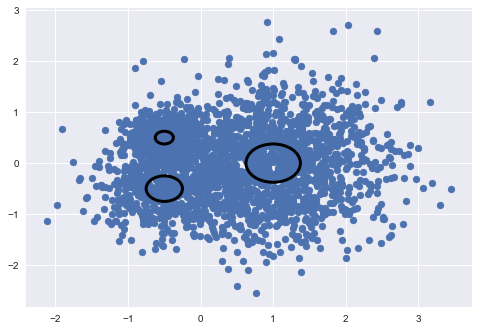

In [39]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

In [40]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [41]:
initialize_centroids(points, 3)

array([[-0.27035951,  0.0135737 ],
       [-0.38326015, -0.98229731],
       [ 1.270903  , -0.68393618]])

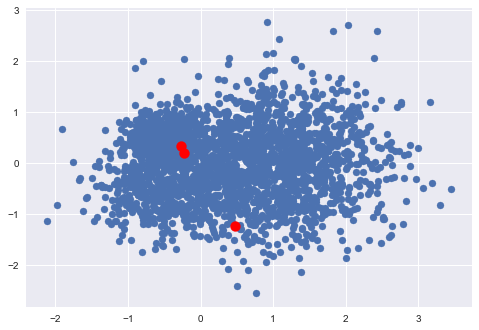

In [42]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [43]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [44]:
c = initialize_centroids(points, 8)
closest_centroid(points, c)

array([1, 2, 4, ..., 5, 6, 3])

In [45]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [46]:
move_centroids(points, closest_centroid(points, c), c)

array([[ 1.45332636, -0.70997893],
       [-0.31368256,  0.12389083],
       [ 1.4204462 ,  0.56742092],
       [-0.01518127, -1.07312036],
       [-0.02165122,  0.63929711],
       [-0.60644985, -0.68081962],
       [-0.91236156,  0.12087201],
       [ 0.42678178, -0.41176616]])

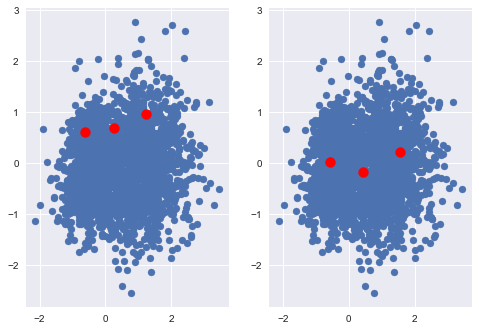

In [47]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)


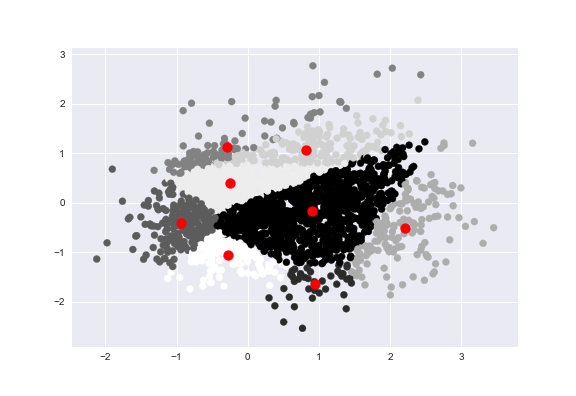
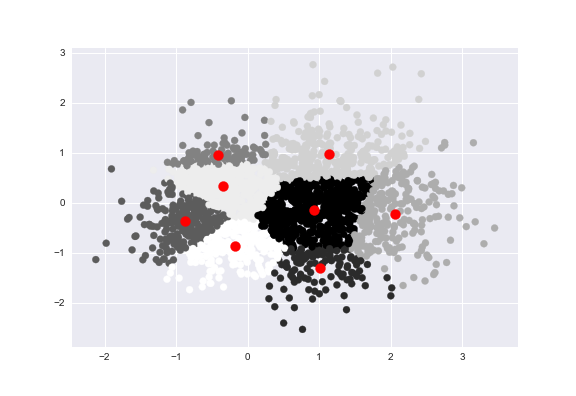
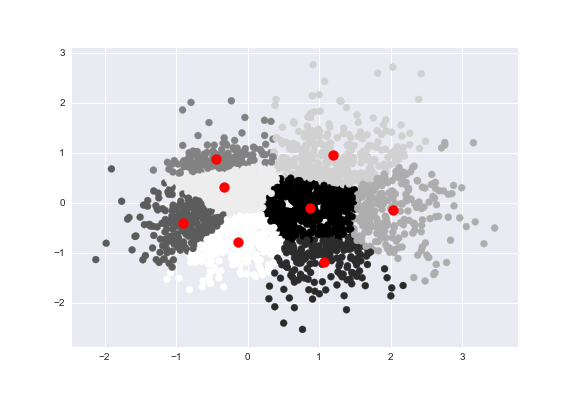
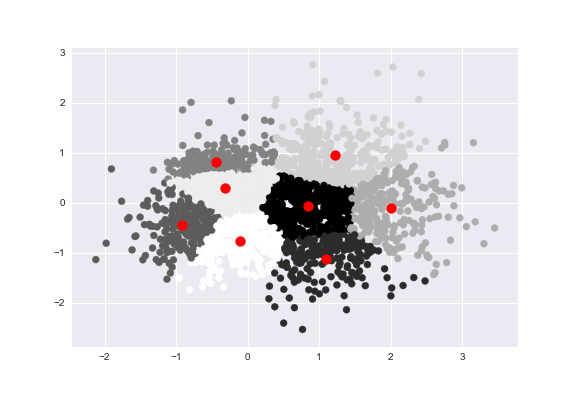
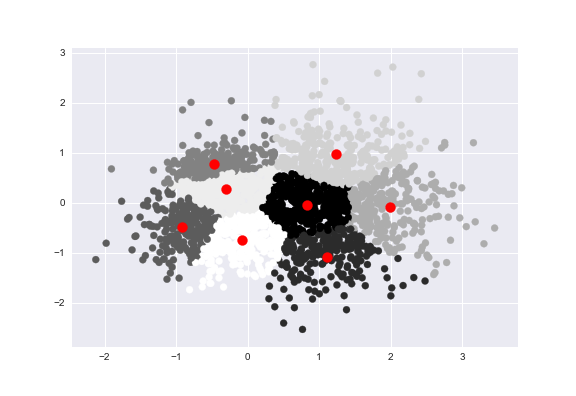
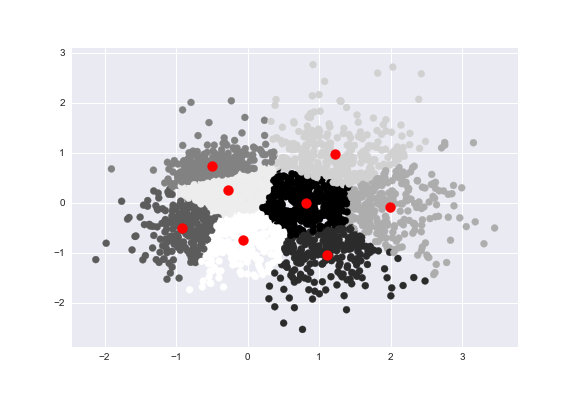
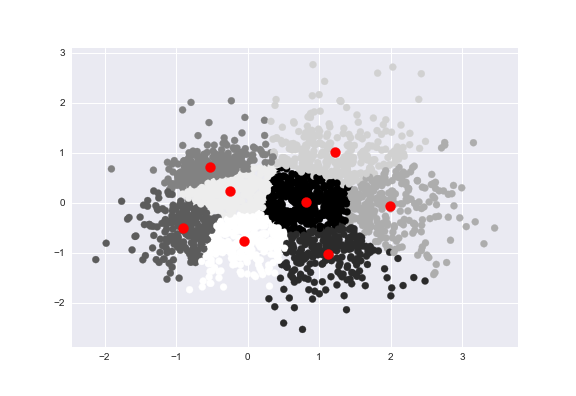
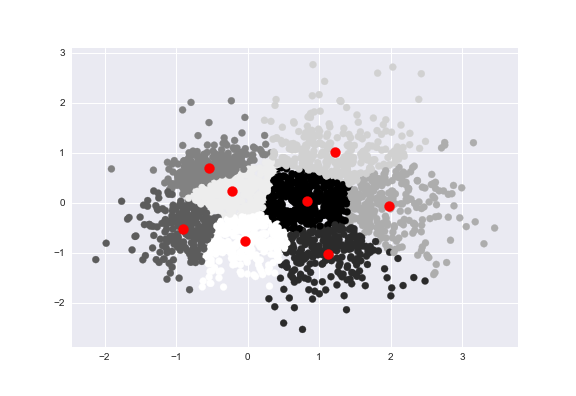
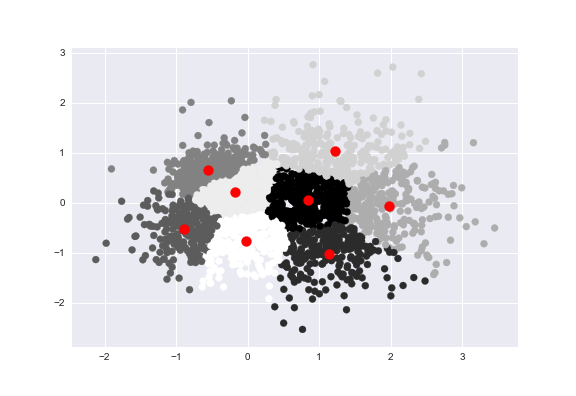
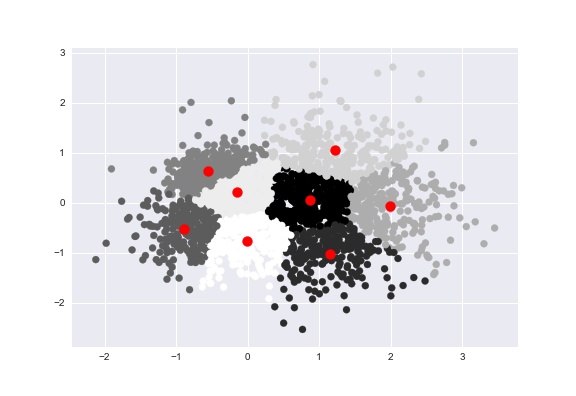

In [49]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 8)

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=10, interval=200, blit=True)